In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [295]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Papua.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       363 non-null    float64       
 2   Tx       363 non-null    float64       
 3   Tavg     350 non-null    float64       
 4   RH_avg   350 non-null    float64       
 5   RR       302 non-null    float64       
 6   ss       363 non-null    float64       
 7   ff_x     364 non-null    float64       
 8   ddd_x    364 non-null    float64       
 9   ff_avg   364 non-null    float64       
 10  ddd_car  364 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-295-a56b662036aa>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [296]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,16.2,25.3,NaN,NaN
1,2023-02-01,15.5,26.6,0.1,19.3
2,2023-03-01,15.5,27.4,8888.0,19.2
3,2023-04-01,15.6,26.4,3.8,19.6
4,2023-05-01,15.8,26.5,2.2,19.9
...,...,...,...,...,...
360,2023-12-16,16.4,27.9,19.1,19.9
361,2023-12-17,16.9,26.9,14.0,20.4
362,2023-12-18,16.6,26.1,9.4,20.7
363,2023-12-19,17.8,28.4,1.8,20.5


In [297]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [298]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [299]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [300]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,16.2,25.3,NaN,NaN
1,31,31,2023-01-02,17.0,26.5,2.7,20.2
2,59,60,2023-01-03,16.2,25.9,8.7,19.6
3,90,92,2023-01-04,14.9,25.7,0.1,19.6
4,120,123,2023-01-05,18.3,25.7,0.6,20.9
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,16.4,27.9,19.1,19.9
350,350,361,2023-12-17,16.9,26.9,14.0,20.4
351,351,362,2023-12-18,16.6,26.1,9.4,20.7
352,352,363,2023-12-19,17.8,28.4,1.8,20.5


In [301]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          2
Tx          2
RR         60
Tavg       15
dtype: int64

In [302]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [303]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

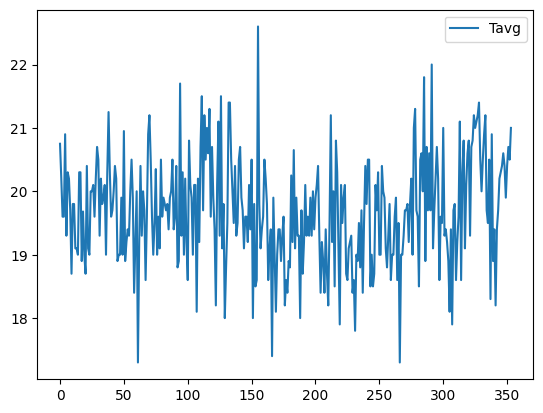

In [304]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

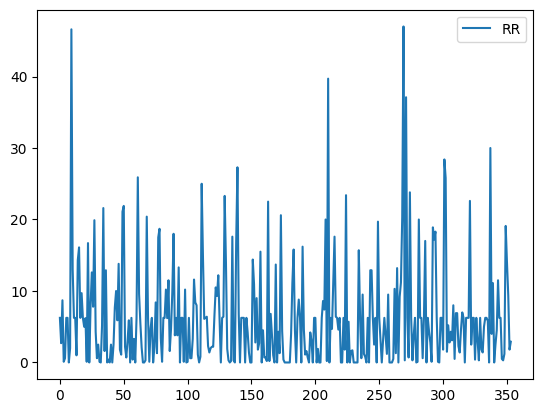

In [305]:
#plotting tavg
df1[['RR']].plot()

In [306]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,16.2,25.3,6.242517,20.75,26.5,20.2,2.700000
1,31,31,2023-01-02,17.0,26.5,2.700000,20.20,25.9,19.6,8.700000
2,59,60,2023-01-03,16.2,25.9,8.700000,19.60,25.7,19.6,0.100000
3,90,92,2023-01-04,14.9,25.7,0.100000,19.60,25.7,20.9,0.600000
4,120,123,2023-01-05,18.3,25.7,0.600000,20.90,26.8,19.3,6.242517
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,16.4,27.9,19.100000,19.90,26.9,20.4,14.000000
350,350,361,2023-12-17,16.9,26.9,14.000000,20.40,26.1,20.7,9.400000
351,351,362,2023-12-18,16.6,26.1,9.400000,20.70,28.4,20.5,1.800000
352,352,363,2023-12-19,17.8,28.4,1.800000,20.50,28.0,21.0,2.900000


In [307]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,6.242517,20.75,20.2,2.700000
1,2.700000,20.20,19.6,8.700000
2,8.700000,19.60,19.6,0.100000
3,0.100000,19.60,20.9,0.600000
4,0.600000,20.90,19.3,6.242517
...,...,...,...,...
349,19.100000,19.90,20.4,14.000000
350,14.000000,20.40,20.7,9.400000
351,9.400000,20.70,20.5,1.800000
352,1.800000,20.50,21.0,2.900000


In [308]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,6.242517,20.75,20.2,2.700000
1,2.700000,20.20,19.6,8.700000
2,8.700000,19.60,19.6,0.100000
3,0.100000,19.60,20.9,0.600000
4,0.600000,20.90,19.3,6.242517
...,...,...,...,...
348,1.200000,20.40,19.9,19.100000
349,19.100000,19.90,20.4,14.000000
350,14.000000,20.40,20.7,9.400000
351,9.400000,20.70,20.5,1.800000


In [309]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [310]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,6.242517,20.75,20.2,2.700000,0
1,2.700000,20.20,19.6,8.700000,1
2,8.700000,19.60,19.6,0.100000,2
3,0.100000,19.60,20.9,0.600000,3
4,0.600000,20.90,19.3,6.242517,4
...,...,...,...,...,...
348,1.200000,20.40,19.9,19.100000,348
349,19.100000,19.90,20.4,14.000000,349
350,14.000000,20.40,20.7,9.400000,350
351,9.400000,20.70,20.5,1.800000,351


In [311]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [312]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [313]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [314]:
X_test

,Indeks,Tavg
282,282,20.5
283,283,20.6
284,284,20.0
285,285,21.8
286,286,18.9
...,...,...
348,348,20.4
349,349,19.9
350,350,20.4
351,351,20.7


In [315]:
#testing
pred1 = lr.predict(X_test)
pred1

array([19.46186695, 19.47174374, 19.40090381, 19.60680691, 19.2707549 ,
       19.47665801, 19.35969423, 19.4618187 , 19.35638588, 19.61994379,
       19.28389178, 19.35142336, 19.40742399, 19.46342462, 19.40411564,
       19.21796611, 19.33162154, 19.3184364 , 19.48974663, 19.29206614,
       19.30194292, 19.27722683, 19.24097977, 19.14707792, 19.29532623,
       19.12070765, 19.32661076, 19.33648755, 19.19646185, 19.26399344,
       19.30846311, 19.47977333, 19.18984516, 19.38421731, 19.44021793,
       19.24253744, 19.35619287, 19.41219349, 19.43360124, 19.25898267,
       19.41876193, 19.42863872, 19.47310839, 19.44839229, 19.45826908,
       19.46814587, 19.48955361, 19.3841208 , 19.32481182, 19.38081245,
       19.42528212, 19.45822082, 19.28360225, 19.25888616, 19.37254158,
       19.11720629, 19.41535708, 19.1830837 , 19.23908433, 19.09905863,
       19.23577598, 19.26871469, 19.32471531, 19.3345921 , 19.34446889,
       19.36587663, 19.34116054, 19.28185157, 19.33785219, 19.37

In [316]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.9572952030248276 1.2635004224699908


In [317]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,20.5
283,283,20.6
284,284,20.0
285,285,21.8
286,286,18.9
...,...,...
348,348,20.4
349,349,19.9
350,350,20.4
351,351,20.7


In [318]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,19.461867
283,19.471744
284,19.400904
285,19.606807
286,19.270755
...,...
348,19.341161
349,19.281852
350,19.337852


In [319]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-319-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,20.75,NaN
1,20.20,NaN
2,19.60,NaN
3,19.60,NaN
4,20.90,NaN
...,...,...
348,20.40,19.341161
349,19.90,19.281852
350,20.40,19.337852
351,20.70,19.370791


<Axes: >

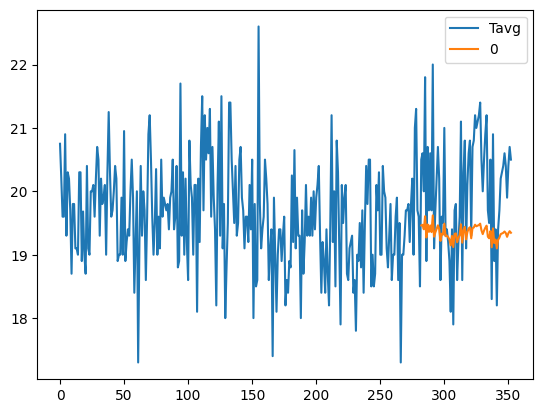

In [320]:
kan.plot()

In [321]:
new_data = [[354, 20.5],[355,20.5],[356,20.5],[357,20.5],[358,20.5],[359,20.5],[360,20.5]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.34276646, 19.34111229, 19.33945811, 19.33780394, 19.33614977,
       19.33449559, 19.33284142])

In [323]:
kan.to_json('Prediksi Papua')